In [1]:
# Step 0. Load libraries and custom modules
# Basic input/output
import pickle
# Matrices and dataframes
import numpy as np
import pandas as pd
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Maths and Stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# Machine Learning
from sklearn.linear_model import LinearRegression
# Metrics
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Step 1. Load data and prepare

#    (a) Original owners of database:
# 	Marine Resources Division
# 	Marine Research Laboratories - Taroona
# 	Department of Primary Industry and Fisheries, Tasmania
# 	GPO Box 619F, Hobart, Tasmania 7001, Australia
# 	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

#    (b) Donor of database:
# 	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
# 	Department of Computer Science, University of Tasmania
# 	GPO Box 252C, Hobart, Tasmania 7001, Australia

#    (c) Date received: December 1995

# Relevant Information Paragraph:

#    Predicting the age of abalone from physical measurements.  
#    The age of abalone is determined by cutting the shell through the 
#    cone, staining it, and counting the number of rings through a 
#    microscope -- a boring and time-consuming task.  Other 
#    measurements, which are easier to obtain, are used to predict the 
#    age.  Further information, such as weather patterns and location 
#    (hence food availability) may be required to solve the problem.

#    From the original data examples with missing values were removed 
#    (the majority having the predicted value missing), and the ranges 
#    of the continuous values have been scaled for use with an ANN 
#    (by dividing by 200).

#    Data comes from an original (non-machine-learning) study:

# 	Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn 
#   and Wes B Ford (1994) "The Population Biology of Abalone 
#   (_Haliotis_species) in Tasmania. I. Blacklip Abalone (_H. rubra_) 
#   from the North Coast and Islands of Bass Strait", Sea Fisheries 
#   Division, Technical Report No. 48 (ISSN 1034-3288)

#  Attribute information:

#    Given is the attribute name, attribute type, the measurement unit 
#    and a brief description.  The number of rings is the value to 
#    predict: either as a continuous value or as a classification 
#    problem.

# 	Name		    Data Type	Meas.	Description
# 	----		    ---------	-----	-----------
# 	Sex		        nominal			    M, F, and I (infant)
# 	Length		    continuous	mm	    Longest shell measurement
# 	Diameter	    continuous	mm	    perpendicular to length
# 	Height		    continuous	mm	    with meat in shell
# 	Whole weight	continuous	grams	whole abalone
# 	Shucked weight	continuous	grams	weight of meat
# 	Viscera weight	continuous	grams	gut weight (after bleeding)
# 	Shell weight	continuous	grams	after being dried
# 	Rings		    integer			    +1.5 gives the age in years

url = 'https://archive.ics.uci.edu/ml/' + \
    'machine-learning-databases/abalone/abalone.data'
df_raw = pd.read_csv(url, header=None)
df_raw.columns = ['sex','length_mm','diameter_mm','height_mm',
    'whole_weight_gr','shucked_weight_gr','viscera_weight_gr',
    'shell_weight_gr','rings']

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                4177 non-null   object 
 1   length_mm          4177 non-null   float64
 2   diameter_mm        4177 non-null   float64
 3   height_mm          4177 non-null   float64
 4   whole_weight_gr    4177 non-null   float64
 5   shucked_weight_gr  4177 non-null   float64
 6   viscera_weight_gr  4177 non-null   float64
 7   shell_weight_gr    4177 non-null   float64
 8   rings              4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df_raw.sample(10)

sex  length_mm  diameter_mm  height_mm  whole_weight_gr  \
994    F      0.580        0.450      0.145           1.1370   
1009   F      0.615        0.480      0.160           1.2525   
1560   I      0.435        0.325      0.110           0.3670   
3440   I      0.465        0.370      0.100           0.5055   
2751   F      0.515        0.395      0.135           0.5160   
949    M      0.480        0.375      0.115           0.6765   
2058   M      0.485        0.390      0.135           0.6170   
3356   I      0.390        0.300      0.100           0.3085   
849    M      0.550        0.450      0.150           1.0145   
3849   M      0.385        0.300      0.115           0.3435   

      shucked_weight_gr  viscera_weight_gr  shell_weight_gr  rings  
994              0.5585             0.2200           0.2900      8  
1009             0.5850             0.2595           0.3300      8  
1560             0.1595             0.0800           0.1050      6  
3440             0.2340             0.1100           0.1400      7  
2751             0.2015             0.1320           0.1620      9  
949              0.3205             0.1065           0.1700      6  
2058             0.2500             0.1345           0.1635      8  
3356             0.1385             0.0735           0.0850      6  
849              0.4070             0.2015           0.2875     10  
3849             0.1645             0.0850           0.1025      6

In [5]:
df_interim = df_raw.copy()
df_interim['sex'] = df_interim['sex'].astype('category')
df_interim['age'] = df_interim['rings'] + 1.5

In [6]:
df = df_interim.copy()

In [7]:
X = df.drop(['rings','age'], axis=1)
y = df[['age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
df_train = pd.concat([X_train,y_train], axis=1)

In [8]:
df_train.describe().T

count       mean       std     min     25%       50%  \
length_mm          3132.0   0.524729  0.119612  0.0750  0.4500   0.54500   
diameter_mm        3132.0   0.408410  0.098746  0.0550  0.3500   0.42500   
height_mm          3132.0   0.139799  0.042385  0.0000  0.1150   0.14500   
whole_weight_gr    3132.0   0.829697  0.488028  0.0020  0.4475   0.80000   
shucked_weight_gr  3132.0   0.359679  0.221254  0.0010  0.1880   0.33625   
viscera_weight_gr  3132.0   0.181121  0.109618  0.0005  0.0950   0.17100   
shell_weight_gr    3132.0   0.239315  0.138384  0.0015  0.1300   0.23500   
age                3132.0  11.448276  3.257677  2.5000  9.5000  10.50000   

                         75%      max  
length_mm           0.615000   0.8000  
diameter_mm         0.480000   0.6300  
height_mm           0.165000   1.1300  
whole_weight_gr     1.153000   2.7795  
shucked_weight_gr   0.502000   1.4880  
viscera_weight_gr   0.252500   0.7600  
shell_weight_gr     0.325625   1.0050  
age                12.500000  30.5000

In [9]:
df_train.describe(include='category')

sex
count   3132
unique     3
top        M
freq    1131

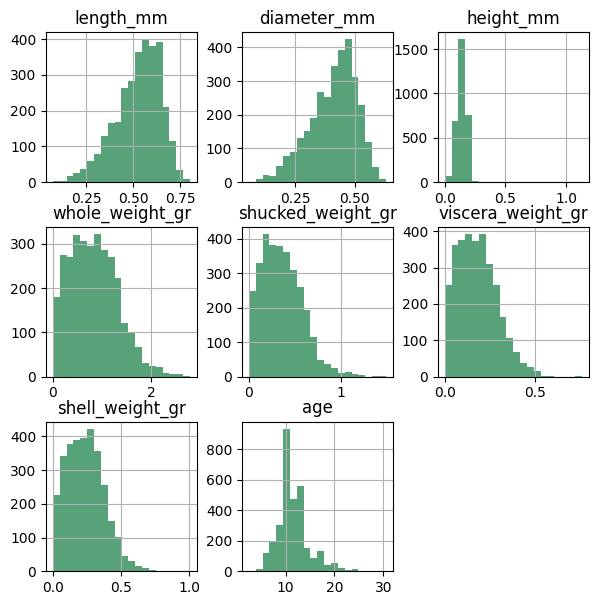

In [10]:
df_train.hist(figsize=(7,7), color='seagreen', alpha=0.8, bins=20)
plt.show()

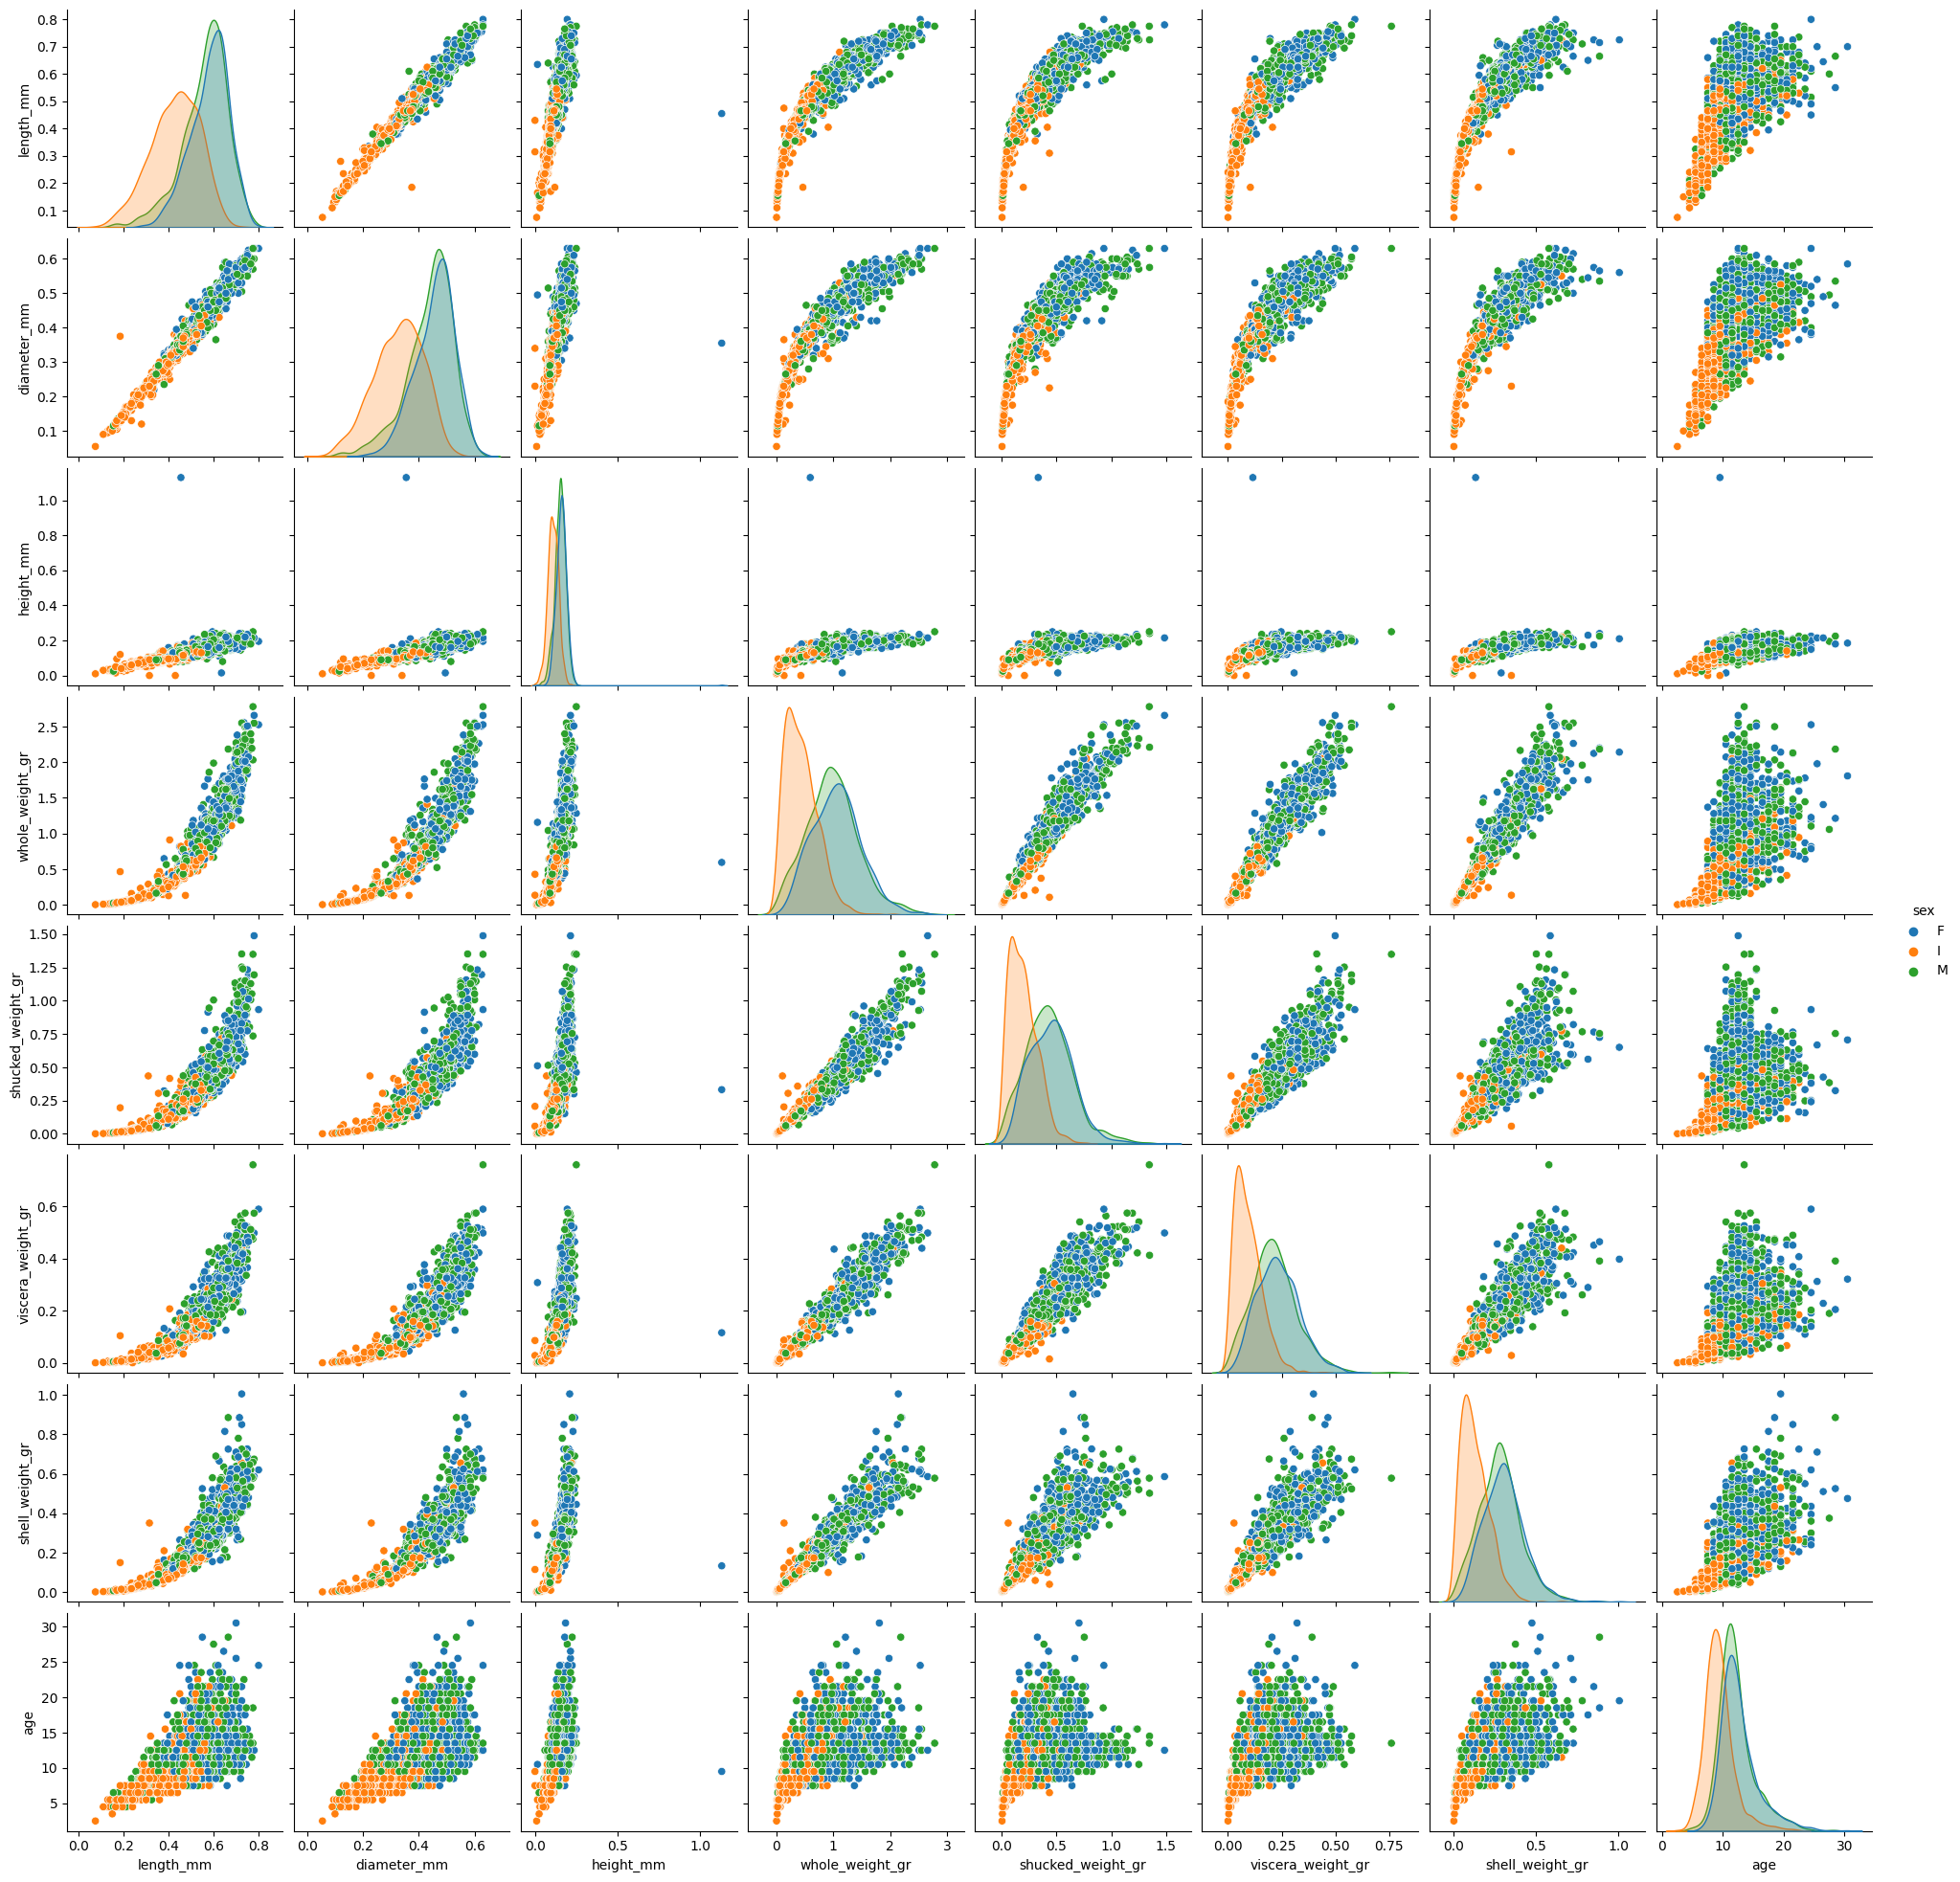

In [11]:
sns.pairplot(data=df_train, hue='sex')
plt.show()

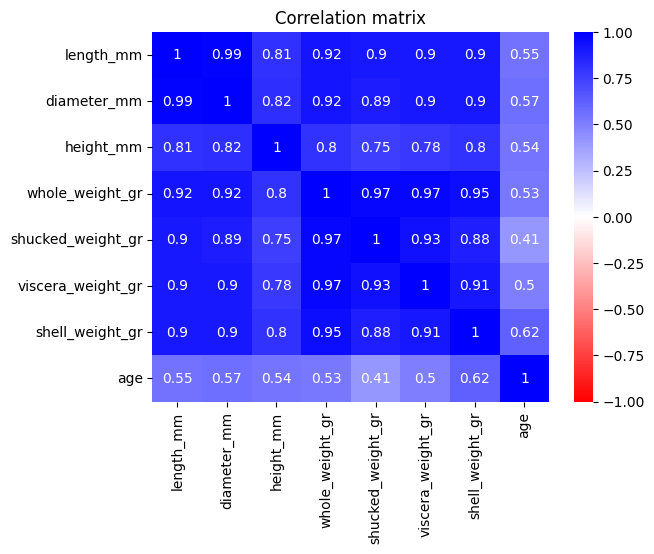

In [12]:
sns.heatmap(data=df_train.corr().round(2), annot=True, vmax=1, vmin=-1, cmap='bwr_r')
plt.title('Correlation matrix')
plt.show()

In [13]:
X_vif = X_train.drop('sex', axis=1).assign(const=1)
vif = [variance_inflation_factor(X_vif, i) for i in range(len(X_vif.columns))]
df_vif = pd.DataFrame({'name':X_vif.columns,'vif':vif,})
df_vif.style.background_gradient(cmap='Blues')

In [30]:
df_mod = df_train.copy()
df_mod['diff_length_diameter_mm'] = df_mod['length_mm'] - \
    df_mod['diameter_mm']
df_mod['diff_whole_shucked_mm'] = df_mod['whole_weight_gr'] - \
    df_mod['shucked_weight_gr']
df_mod['ratio_diameter_length'] = df_mod['diameter_mm'] / \
    df_mod['length_mm']
df_mod['diff_whole_viscera'] = df_mod['whole_weight_gr'] - \
    df_mod['viscera_weight_gr']
df_mod['diff_shucked_viscera'] = df_mod['shucked_weight_gr'] - \
    df_mod['viscera_weight_gr']
df_mod['ratio_viscera_meat'] = df_mod['viscera_weight_gr'] / \
    df_mod['shucked_weight_gr']
df_mod['ratio_diameter_shell'] = df_mod['diameter_mm'] / \
    df_mod['shell_weight_gr']
df_mod = df_mod.drop('diameter_mm', axis=1)


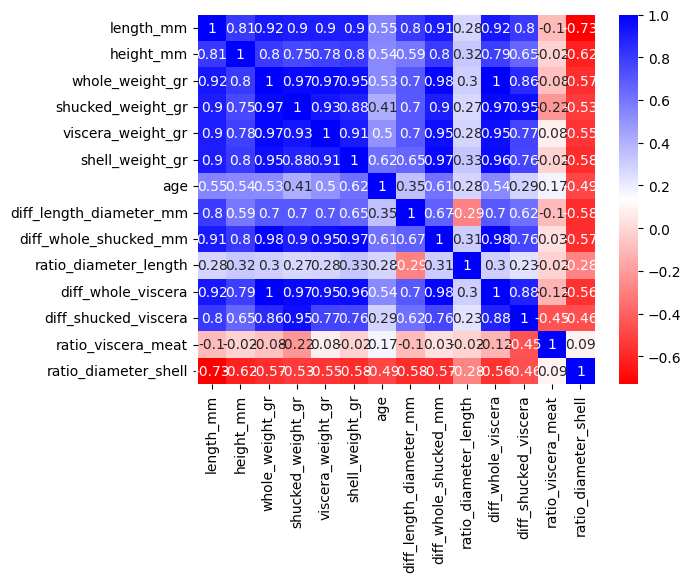

In [31]:
sns.heatmap(data=df_mod.corr().round(2),annot=True, cmap='bwr_r')
plt.show()

In [32]:
df_mod.corr()

length_mm  height_mm  whole_weight_gr  \
length_mm                 1.000000   0.810001         0.924883   
height_mm                 0.810001   1.000000         0.798391   
whole_weight_gr           0.924883   0.798391         1.000000   
shucked_weight_gr         0.897512   0.753140         0.968707   
viscera_weight_gr         0.900706   0.778323         0.966562   
shell_weight_gr           0.896899   0.797246         0.954079   
age                       0.550201   0.544773         0.534042   
diff_length_diameter_mm   0.804392   0.591908         0.702081   
diff_whole_shucked_mm     0.905564   0.798852         0.980458   
ratio_diameter_length     0.283288   0.316209         0.298657   
diff_whole_viscera        0.920459   0.794342         0.997305   
diff_shucked_viscera      0.795869   0.648185         0.863888   
ratio_viscera_meat       -0.104967  -0.022113        -0.081030   
ratio_diameter_shell     -0.731127  -0.619509        -0.566112   

                         shucked_weight_gr  viscera_weight_gr  \
length_mm                         0.897512           0.900706   
height_mm                         0.753140           0.778323   
whole_weight_gr                   0.968707           0.966562   
shucked_weight_gr                 1.000000           0.932462   
viscera_weight_gr                 0.932462           1.000000   
shell_weight_gr                   0.879557           0.906747   
age                               0.410498           0.496069   
diff_length_diameter_mm           0.699119           0.696653   
diff_whole_shucked_mm             0.900948           0.950728   
ratio_diameter_length             0.267334           0.276125   
diff_whole_viscera                0.967199           0.945141   
diff_shucked_viscera              0.948872           0.770749   
ratio_viscera_meat               -0.219488           0.075962   
ratio_diameter_shell             -0.532208          -0.546532   

                         shell_weight_gr       age  diff_length_diameter_mm  \
length_mm                       0.896899  0.550201                 0.804392   
height_mm                       0.797246  0.544773                 0.591908   
whole_weight_gr                 0.954079  0.534042                 0.702081   
shucked_weight_gr               0.879557  0.410498                 0.699119   
viscera_weight_gr               0.906747  0.496069                 0.696653   
shell_weight_gr                 1.000000  0.622547                 0.652393   
age                             0.622547  1.000000                 0.350732   
diff_length_diameter_mm         0.652393  0.350732                 1.000000   
diff_whole_shucked_mm           0.970837  0.608281                 0.673295   
ratio_diameter_length           0.326659  0.282704                -0.286173   
diff_whole_viscera              0.955922  0.538359                 0.695024   
diff_shucked_viscera            0.758924  0.290517                 0.624272   
ratio_viscera_meat             -0.017844  0.174308                -0.097878   
ratio_diameter_shell           -0.583279 -0.488644                -0.577839   

                         diff_whole_shucked_mm  ratio_diameter_length  \
length_mm                             0.905564               0.283288   
height_mm                             0.798852               0.316209   
whole_weight_gr                       0.980458               0.298657   
shucked_weight_gr                     0.900948               0.267334   
viscera_weight_gr                     0.950728               0.276125   
shell_weight_gr                       0.970837               0.326659   
age                                   0.608281               0.282704   
diff_length_diameter_mm               0.673295              -0.286173   
diff_whole_shucked_mm                 1.000000               0.310240   
ratio_diameter_length                 0.310240               1.000000   
diff_whole_viscera                    0.976942               0.301442

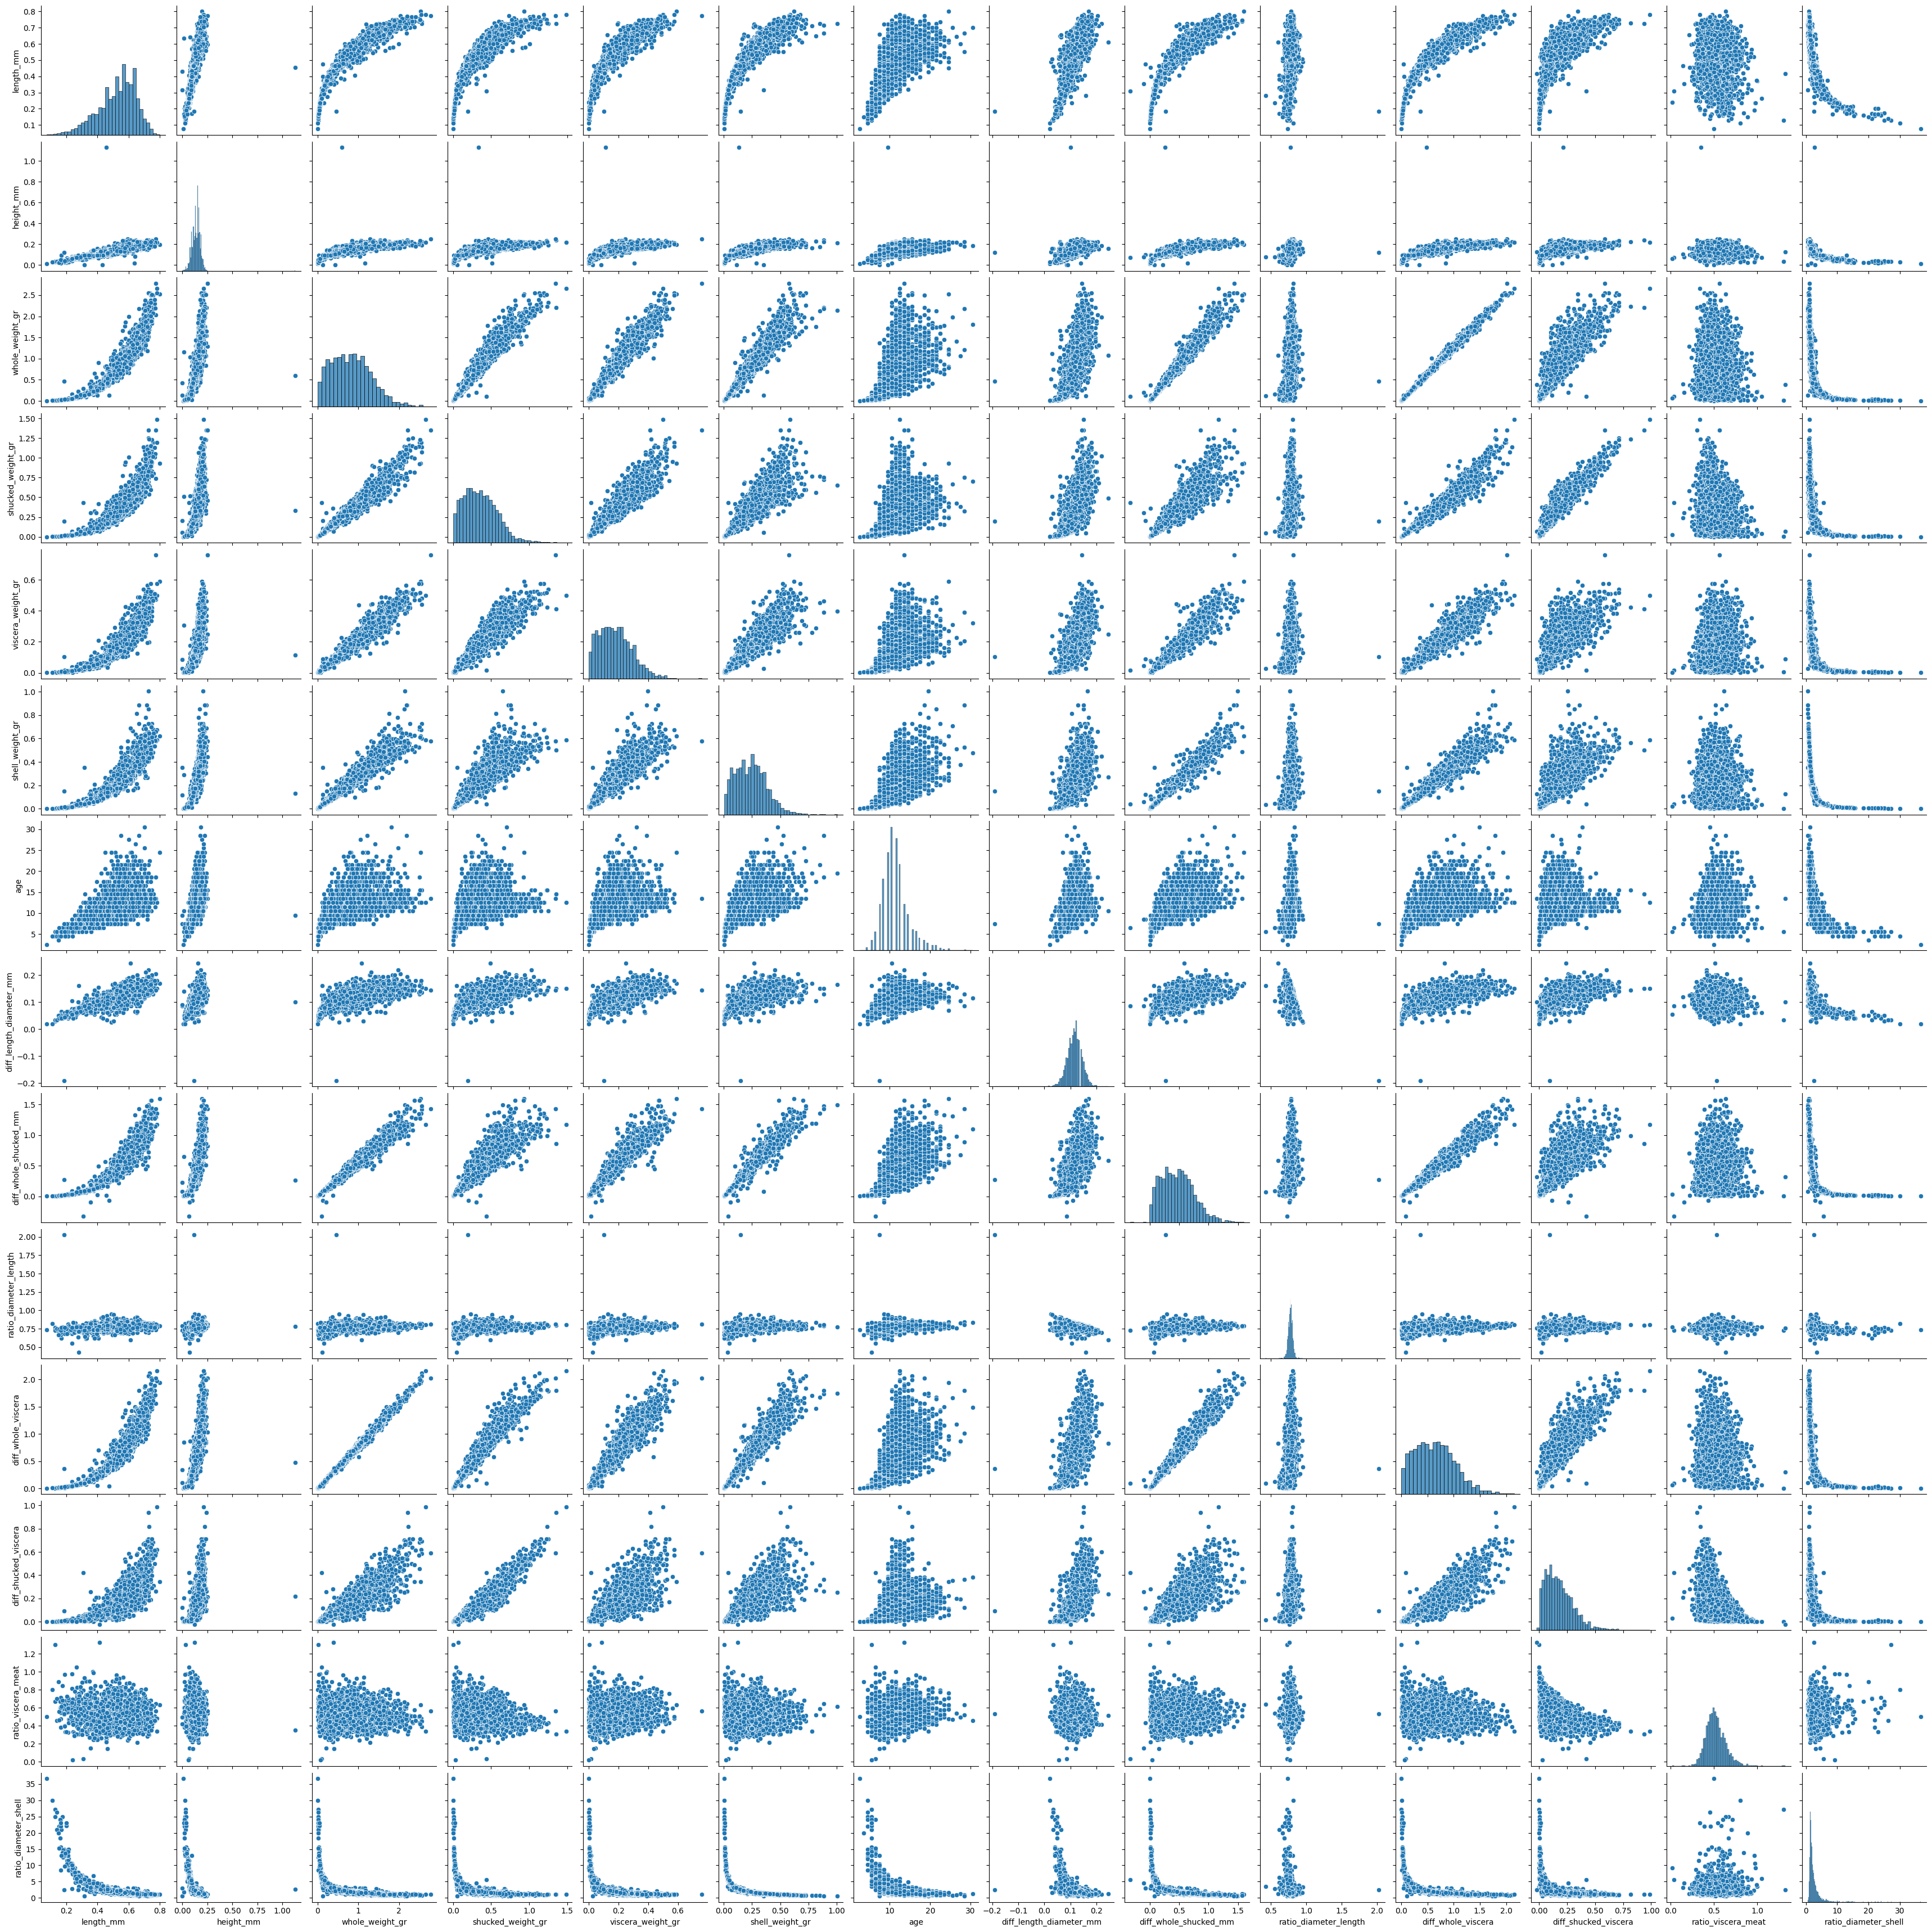

In [33]:
sns.pairplot(data=df_mod)